<a href="https://colab.research.google.com/github/ahmedjajan93/Analysis-Patients-miss-their-appointments-data-with-pandas/blob/main/Patients_miss_their_appointments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary of the Module**

This project demonstrates different stages of work:

* Data Exploration
* Data Cleaning
* Data Visualization
* Data Analysis

**Research Question**

* Who schedules an appointment but does not attend? What are the reasons?

* This project aims to analyze the available data to answer the following questions:

* Does age have an impact on attendance/no-show status?

* Is there a combined effect of age and gender on attendance/no-show status?

**Dataset Description**

The dataset contains the following columns:

* PatientId: Unique patient number
* AppointmentID: Unique appointment number
* Gender: M (Male) or F (Female)
* ScheduledDay: Date the appointment was scheduled
* AppointmentDay: Date of the appointment
* Age: Patient’s age
* Neighbourhood: The residential area of the patient
* Scholarship: Whether the patient has a scholarship (0 or 1)
* Hypertension: Whether the patient has hypertension (0 or 1)
* Diabetes: Whether the patient has diabetes (0 or 1)
* Alcoholism: Whether the patient has a history of alcoholism (0 or 1)
* Handicap: Number of disabilities (0, 1, 2, 3, or 4)
* SMS_received: Whether the patient received an SMS reminder (0 or 1)
* No-show: Whether the patient attended the appointment (Yes = did not attend, No = attended)


**Data Exploration**

The first stage in data analysis is data exploration, which typically involves answering the following questions:

* How many rows (data points) are in the dataset?
* How many columns (features) are in the dataset?
* What are the data types of each column?
* Are there any duplicate rows?
* Are there any missing values?
* How many unique values are there in each column?
* What are these unique values?

In [1]:
# Import Data
import zipfile
with zipfile.ZipFile('archive.zip','r') as zip_ref:
  zip_ref.extractall()

In [2]:
import pandas as pd
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# print first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# print last 5 rows
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# print some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.shape

(110527, 14)

In [8]:
# Display the missing values in the each column
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [9]:
# Display the columns names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
df.dtypes

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [11]:
# Display the unique values of some columns.
print(df['Gender'].unique())
print(df['Scholarship'].unique())
print(df['Diabetes'].unique())
print(df['Alcoholism'].unique())

['F' 'M']
[0 1]
[0 1]
[0 1]


In [12]:
# Check for duplicate records.
sum(df.duplicated())

0

In [13]:
df['No-show'].value_counts()

,count
No-show,
No,88208
Yes,22319


**Conclusions**
* There are 13 independent variables and one dependent variable (No-show) in the dataset. If we look at this column, we see that it contains the values No and Yes. Since the column name is No-show, a value of No means the patient attended the appointment, whereas a value of Yes means the patient did not attend.

* The dataset does not contain any missing values at the moment.

* The data type of the columns **Schedule_day** and **Appointment_day** should be changed to datetime, as they are currently of type object.

* We noticed that the No-show column is imbalanced.

* The dataset does not include an appointment time. If we look at the **AppointmentDay** column, we see that the time is always 00:00:00. Therefore, we cannot analyze whether the appointment time has any impact on attendance.

**Data Cleaning**
* The minimum age value is -1, and it is clear that people cannot have an age of -1.

* The columns **PatientId** and **AppointmentID** can be removed from the dataset because they are just system-generated numbers and do not play any role in determining the (outcome) attendance or absence.
* Column names should be renamed for easier use during analysis, along with correcting any spelling errors in them.
* The **Handcap** column should be modified to be binary (0 or 1), as we only want to know whether the patient has a disability (1) or not (0), rather than indicating the number of disabilities the patient has.
* The data types of the columns **Schedule_day** and **Appointment_day** should be changed to datetime.
* Since the appointment time is always 00:00:00, we will ignore and drop it as it holds no useful information.

In [14]:
# Display the rows that contain the age -1.
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
df.loc[df['Age'] == -1,'Age'] = 0


In [16]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [17]:
# Delete AppointmentID and PatientId columns .
df.drop(columns = ['PatientId','AppointmentID'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [19]:
# Rename some columns.
columns_dict = {'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'noshow'}
df.rename(columns=columns_dict,inplace=True)
df.rename(columns = lambda x:x.lower(), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
df.handicap = df.handicap.map({0:0,1:1,2:1,3:1,4:1})
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
df.handicap.unique()

array([0, 1])

In [22]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  noshow          110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [23]:
# Print the unique values of the appointment date
df.appointmentday.dt.strftime('%Y-%m-%d').unique()

array(['2016-04-29', '2016-05-03', '2016-05-10', '2016-05-17',
       '2016-05-24', '2016-05-31', '2016-05-02', '2016-05-30',
       '2016-05-16', '2016-05-04', '2016-05-19', '2016-05-12',
       '2016-05-06', '2016-05-20', '2016-05-05', '2016-05-13',
       '2016-05-09', '2016-05-25', '2016-05-11', '2016-05-18',
       '2016-05-14', '2016-06-02', '2016-06-03', '2016-06-06',
       '2016-06-07', '2016-06-01', '2016-06-08'], dtype=object)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'alcoholism'}>],
       [<Axes: title={'center': 'handicap'}>,
        <Axes: title={'center': 'sms_received'}>]], dtype=object)

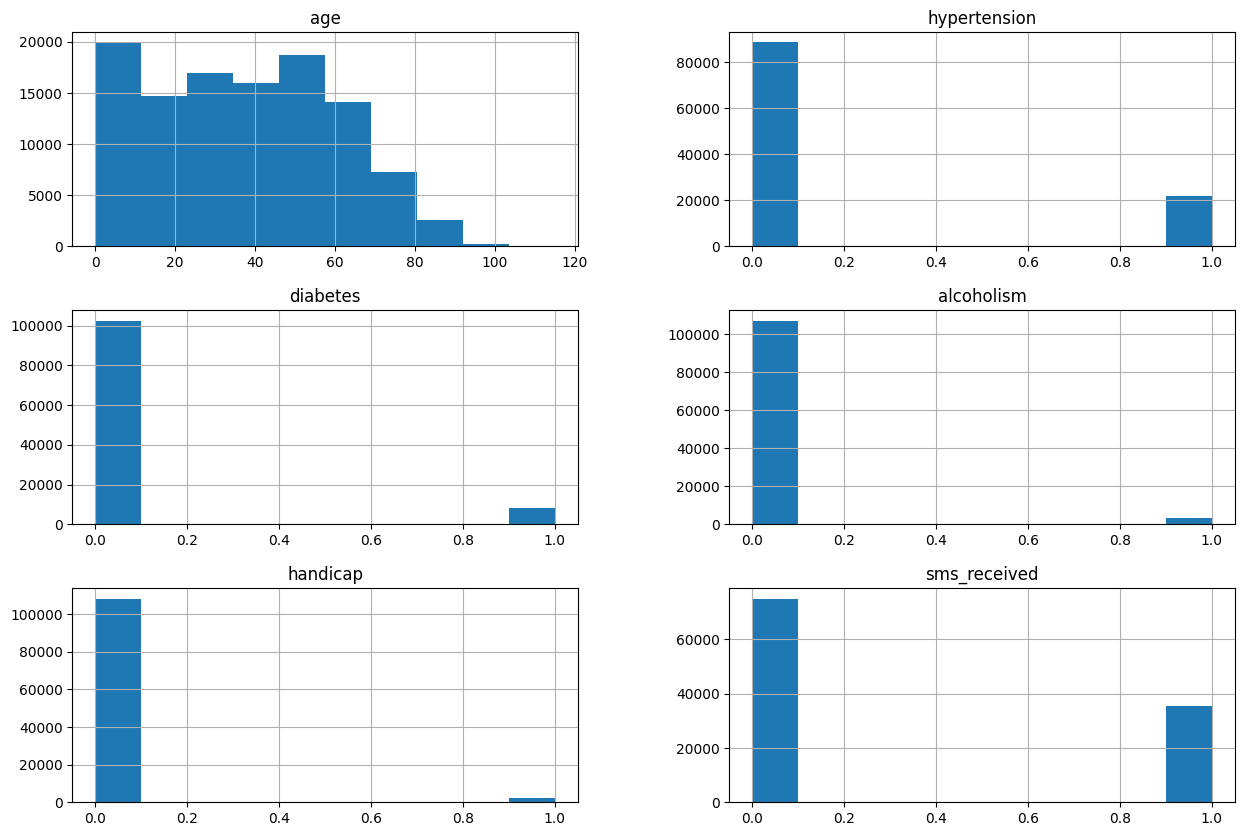

In [24]:
df_draw = df[['age','hypertension','diabetes','alcoholism','handicap','sms_received']]
df_draw.hist(figsize=(15,10))

* **Age:** There is a large number of children, then the numbers for ages between 10 and approximately 60 are equal. After that, the numbers gradually decrease. The age distribution shifts to the left.
* **Alcoholism:** Most patients are not addicted to alcohol.
* **Diabetes:** Most patients are not diabetics, but diabetic patients are more than alcohol addicts.
* **Handicap:** Most individuals are not disabled.
* **SMS Received:** Most patients receive many short messages.
* **Hypertension:** Most patients do not suffer from high blood pressure.

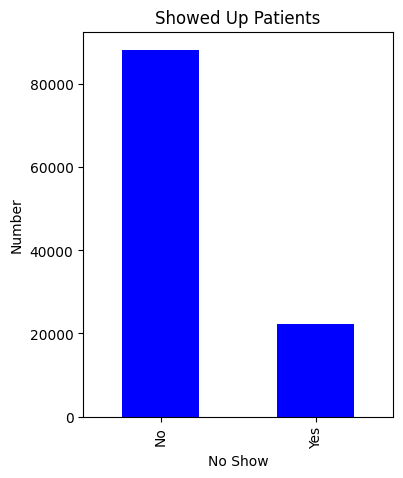

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
c = df.noshow.value_counts()
c.plot.bar(figsize=(4,5),title='Showed Up Patients', color='b')
plt.xlabel('No Show')
plt.ylabel('Number')
plt.show()
sns.set_style('darkgrid')
%matplotlib inline

<Axes: title={'center': 'Showed Up Patients'}, ylabel='count'>

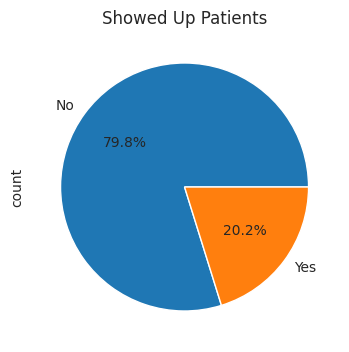

In [26]:
df.noshow.value_counts().plot.pie(figsize=(4,5),title='Showed Up Patients', autopct='%1.1f%%')

<Axes: title={'center': 'M\\F'}, ylabel='count'>

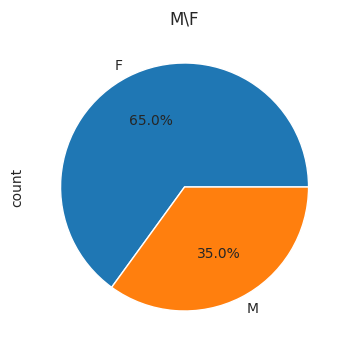

In [27]:
df.gender.value_counts().plot.pie(figsize=(4,5),title='M\F', autopct='%1.1f%%')

<ipython-input-28-934c73601f72>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


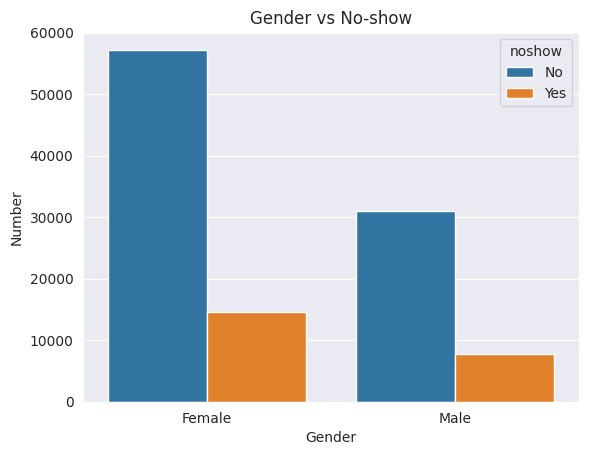

In [28]:
ax = sns.countplot(x=df.gender, hue=df.noshow, data=df)
ax.set_title('Gender vs No-show')
x_ticks_labels = ['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

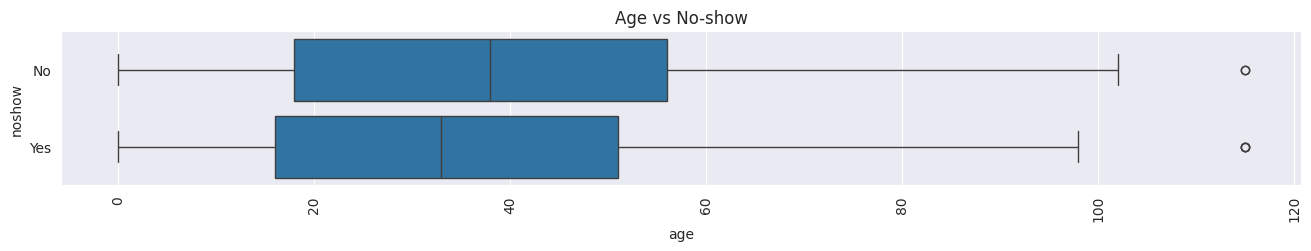

In [29]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
age = sns.boxplot(x=df.age,y=df.noshow).set_title('Age vs No-show')

* The figure shows that people who did not attend their appointments were generally younger.

<ipython-input-33-968263f840e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='gender', y='age', col='noshow', kind='bar', height=6, palette='muted', data=df)


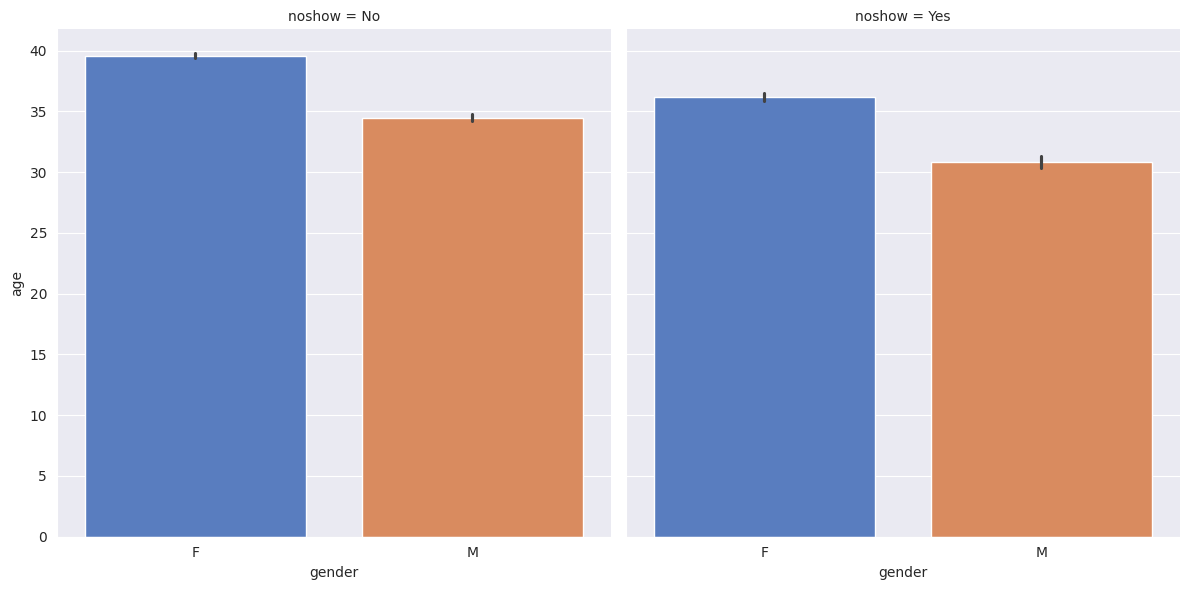

In [33]:
sns.catplot(x='gender', y='age', col='noshow', kind='bar', height=6, palette='muted', data=df)


* The graph shows that the number of females who attend (noshow=No) is greater than the number of females who do not attend.
* The number of males who attend is greater than the number of males who do not attend .

* The number of females in both cases is greater than the number of males.
* Most patients are not alcohol addicts.


**Conclusions**
* Appointments started on 10/11/2015 and ended on 08/06/2016.
* There is a large proportion of young people in the data, with ages ranging between 20-40 years.
* The number of patients significantly decreases for those over 60 years old.
* The average age of patients is 37 years, and most of them are under 55 years old.
* Most patients do not have diabetes, but those who do tend to have had it for a longer duration.
* High blood pressure is not diagnosed in most patients.
* The attendance/absence distributions for different categories are very similar.
* There is no clear indication that any of these variables have a stronger effect than others.
* The graphs confirm an absence rate of around 20% for most categories.
* We have a large number of female patients, suggesting that women tend to care more about their health than men.